In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [3]:
np.random.seed(42)

data = {
    'Action': np.random.randint(1, 11, 100),
    'Comedy': np.random.randint(1, 11, 100),
    'Romance': np.random.randint(1, 11, 100),
    'SciFi': np.random.randint(1, 11, 100),
    'Horror': np.random.randint(1, 11, 100)
}

df = pd.DataFrame(data)
df.head()


,Action,Comedy,Romance,SciFi,Horror
0,7,2,6,5,5
1,4,1,1,8,1
2,8,7,9,1,7
3,5,7,6,5,5
4,7,8,3,3,6


In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


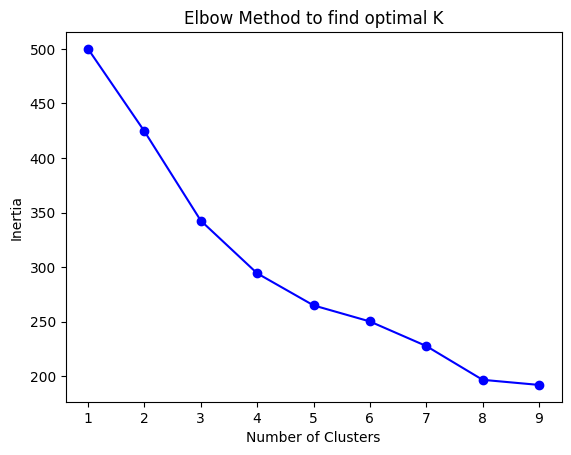

In [6]:
inertia = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to find optimal K')
plt.show()


In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

In [9]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_data)

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]


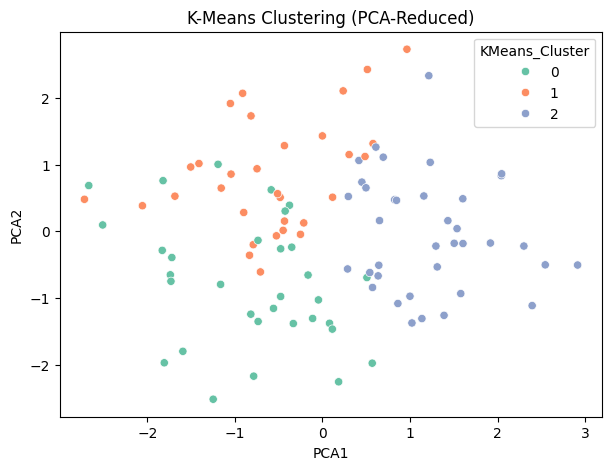

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df, palette='Set2')
plt.title('K-Means Clustering (PCA-Reduced)')
plt.show()